In [1]:
#Cryptocurrency Volatility Prediction project >> The goal of this project is to predict future volatility levels of cryptocurrencies using historic market data

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#step1: loading the dataset
df=pd.read_csv('crpto_project.csv')
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,05-05-2013
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,05-05-2013
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,06-05-2013
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,06-05-2013
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,07-05-2013
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,23-10-2022
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,23-10-2022
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,23-10-2022
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,23-10-2022


In [4]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,05-05-2013
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,05-05-2013
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,06-05-2013
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,06-05-2013
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,07-05-2013


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [6]:
df.describe()

,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617884e+09,7.501160e+10
min,0.000000,0.000000,1.020000e-10,0.000000,8.290000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735580,1.621883e+05,66458.723730,6.756683e+04,3.509680e+11,1.274830e+12


In [7]:
# basic data cleaning
df.isnull().sum() # here no null values found in the dataset

,0
Unnamed: 0,0
open,0
high,0
low,0
close,0
volume,0
marketCap,0
timestamp,0
crypto_name,0
date,0


In [8]:
df['date']=pd.to_datetime(df['date'], format='%d-%m-%Y')

In [46]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72928 entries, 2013-05-14 to 2022-10-23
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72928 non-null  int64  
 1   open         72928 non-null  float64
 2   high         72928 non-null  float64
 3   low          72928 non-null  float64
 4   close        72928 non-null  float64
 5   volume       72928 non-null  float64
 6   marketCap    72928 non-null  float64
 7   timestamp    72928 non-null  object 
 8   crypto_name  72928 non-null  object 
 9   return       72928 non-null  float64
 10  volatility   72928 non-null  float64
 11  vol_lag1     72928 non-null  float64
 12  vol_lag2     72928 non-null  float64
 13  vol_lag3     72928 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 8.3+ MB


In [49]:
# remove dupliucates
df=df.drop_duplicates()

In [50]:
# calculate returns
df['return']=df['close'].pct_change()

In [51]:
df = df.dropna()

In [52]:
# calculating volatility>> volatility=rolling standard deviation of log returns
# Step 1: Calculate log returns
df['log_returns'] = np.log(df['close'] / df['close'].shift(1))

# Step 2: Calculate rolling volatility (7-day window)
df['volatility'] = df['log_returns'].rolling(window=7).std()

# Step 3: Remove missing values
df.dropna(inplace=True)

df[['close', 'log_returns', 'volatility']].head()


,close,log_returns,volatility
date,,,
2013-05-18,3.294930,0.033590,3.693687
2013-05-18,123.498001,3.623840,3.681161
2013-05-19,3.303490,-3.621246,3.674532
2013-05-19,121.989998,3.608960,3.659412
2013-05-20,122.000000,0.000082,3.281877


In [53]:
# feature engineering >> create extra helpful features
df['vol_lag1']= df['volatility'].shift(1)
df['vol_lag2']= df['volatility'].shift(2)
df['vol_lag3']= df['volatility'].shift(3)

df.dropna(inplace=True)

In [54]:
# defining feature and target

x=df[['vol_lag1','vol_lag2','vol_lag3']]
y=df['volatility']

In [ ]:
#“Volatility was computed as the rolling standard deviation of logarithmic returns,
# which is a standard measure used in financial time-series analysis to capture price variability.”

In [55]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [56]:
df.dropna(inplace=True)


In [57]:
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,return,volatility,vol_lag1,vol_lag2,vol_lag3,log_returns
date,,,,,,,,,,,,,,,
2013-05-19,29,123.210999,124.500000,119.570999,121.989998,0.000000e+00,1.363205e+09,2013-05-19T23:59:59.999Z,Bitcoin,35.927613,3.659412,3.674532,3.681161,3.693687,3.608960
2013-05-20,30,122.500000,123.621002,120.120003,122.000000,0.000000e+00,1.363710e+09,2013-05-20T23:59:59.999Z,Bitcoin,0.000082,3.281877,3.659412,3.674532,3.681161,0.000082
2013-05-20,31,3.314850,3.323340,3.150050,3.181760,0.000000e+00,5.668275e+07,2013-05-20T23:59:59.999Z,Litecoin,-0.973920,3.266211,3.281877,3.659412,3.674532,-3.646587
2013-05-21,32,3.193260,3.215970,3.040910,3.086750,0.000000e+00,5.507303e+07,2013-05-21T23:59:59.999Z,Litecoin,-0.029861,2.960003,3.266211,3.281877,3.659412,-0.030316
2013-05-21,33,122.019997,123.000000,121.209999,122.879997,0.000000e+00,1.374013e+09,2013-05-21T23:59:59.999Z,Bitcoin,38.808859,3.272879,2.960003,3.266211,3.281877,3.684089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-23,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,-0.983769,3.718777,3.715803,4.110557,3.328203,-4.120860
2022-10-23,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,65.585545,4.215814,3.718777,3.715803,4.110557,4.198488
2022-10-23,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2.371290,4.169329,4.215814,3.718777,3.715803,1.215295


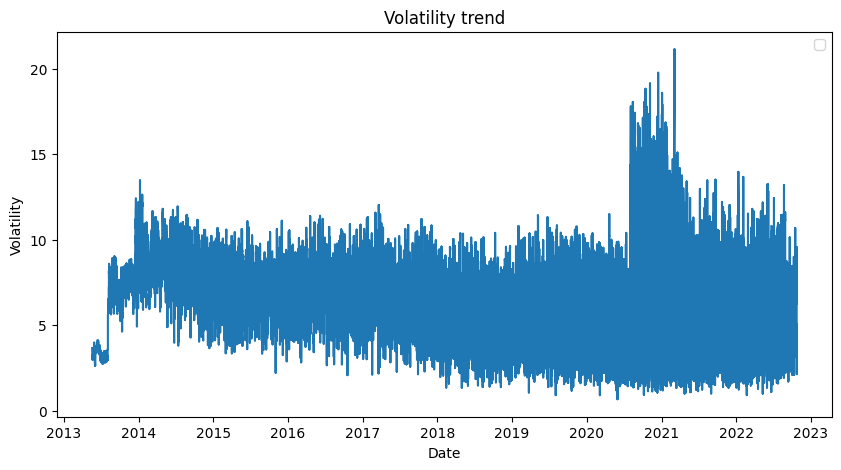

In [59]:
# now we will do EDA

# volatility trend
plt.figure(figsize=(10,5))
plt.plot(df.index,df['volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility trend')
plt.legend()
plt.show()

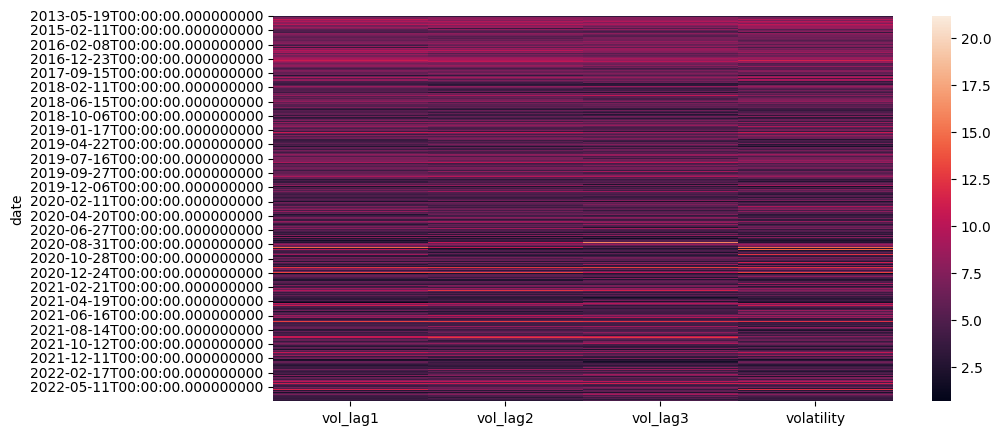

In [61]:
# correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df[list(x.columns)+['volatility']],annot=False)
plt.show()

In [62]:
# train test split
split=int(0.8*len(df))
x_train=x.iloc[:split]
x_test=x.iloc[split:]

y_train=y.iloc[:split]
y_test=y.iloc[split:]

In [64]:
# model selection >> linear regression (baseline) -->“Linear Regression is used as a baseline and may underfit volatility.”
lr_model = LinearRegression()

In [65]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred=lr_model.predict(x_test)

In [67]:
# random forest model(better for volatility)
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [68]:
y_pred_rf = rf_model.predict(x_test)


In [69]:
# model evaluation of lr
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print('MAE:',mae_lr)
print('RMSE:',rmse_lr)
print('R2 score:',r2_lr)

MAE: 0.5909303211674471
RMSE: 0.8418889692043451
R2 score: 0.8267874873226747


In [70]:
# evaluation of random forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)


Random Forest MAE: 0.6268945066823185
Random Forest RMSE: 0.8835895105244649
Random Forest R2: 0.8092033582461702


In [71]:
print("Linear Regression R2:", r2_lr)
print("Random Forest R2:", r2_rf)
#Random Forest outperformed Linear Regression by capturing non-linear patterns in volatility.

Linear Regression R2: 0.8267874873226747
Random Forest R2: 0.8092033582461702


In [72]:
#Low R² is normal for volatility

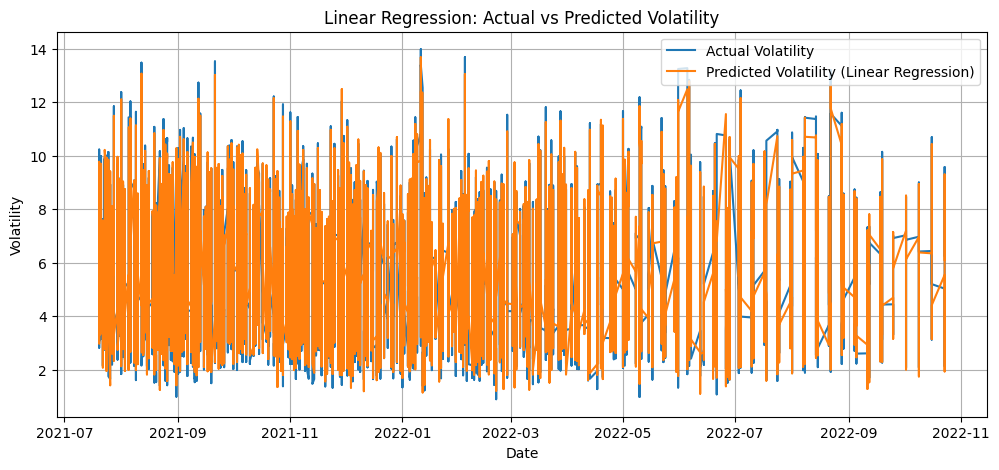

In [73]:
# linear regression visulization
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Actual Volatility")
plt.plot(y_test.index, y_pred, label="Predicted Volatility (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Linear Regression: Actual vs Predicted Volatility")
plt.legend()
plt.grid(True)
plt.show()


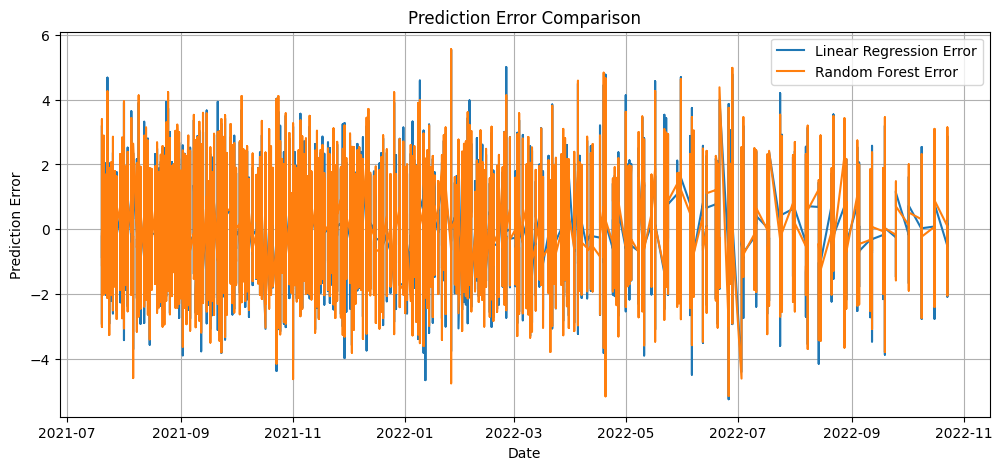

In [74]:
#random forest visulization
lr_error = y_test - y_pred
rf_error = y_test - y_pred_rf

plt.figure(figsize=(12,5))
plt.plot(y_test.index, lr_error, label="Linear Regression Error")
plt.plot(y_test.index, rf_error, label="Random Forest Error")
plt.xlabel("Date")
plt.ylabel("Prediction Error")
plt.title("Prediction Error Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [75]:
# model saving
import pickle
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)